In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
##### Reading period and alt alleles for loci in coding regions and whole genome #####

gene_all = 0
all_all = 0
gene_polymorphic = 0
all_polymorphic = 0

period_df_gene = pd.DataFrame(columns = ['period'])
period_df_all = pd.DataFrame(columns = ['period'])

for i in range(1,23):
    gene_df = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/coding_regions/info/gene_info_chr" + str(i) + ".txt", header=None, sep = "\t")
    all_df = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/coding_regions/info/all_info_chr" + str(i) + ".txt", header=None, sep = "\t")
    
    all_all += len(all_df.index)
    gene_all += len(gene_df.index)
    g
    gene_polymorphic += len(gene_df[gene_df[3] != "."].index)
    all_polymorphic += len(all_df[all_df[3] != "."].index)
    
    
    gene_period = gene_df.groupby([2], as_index=False).agg({3:'count'})
    gene_period.columns = ['period','count'+ str(i)]
    
    all_period = all_df.groupby([2], as_index=False).agg({3:'count'})
    all_period.columns = ['period','count'+ str(i)]
    
    period_df_gene = pd.merge(period_df_gene, gene_period, on = 'period', how='outer')
    period_df_all = pd.merge(period_df_all, all_period, on = 'period', how='outer')
    

In [67]:
print(f"Polymorphic inside gene {gene_polymorphic/gene_all} vs polymorphic other genome {all_polymorphic/all_all}")

Polymorphic inside gene 0.5255803210532394 vs polymorphic other genome 0.8075653579130513


In [68]:
period_df_gene['sum'] =  period_df_gene[list(period_df_gene.filter(regex='count'))].sum(axis=1)
period_df_gene = period_df_gene[['period','sum']]

period_df_all['sum'] =  period_df_all[list(period_df_all.filter(regex='count'))].sum(axis=1)
period_df_all = period_df_all[['period','sum']]

greater_than_6_gene = period_df_gene[period_df_gene['period'] > 6]['sum'].sum()
greater_than_6_gene

greater_than_6_all = period_df_all[period_df_all['period'] > 6]['sum'].sum()
greater_than_6_all

gene_vals = period_df_gene[period_df_gene['period'] < 7]['sum'].to_list()
all_vals = period_df_all[period_df_all['period'] < 7]['sum'].to_list()

gene_vals.append(greater_than_6_gene)
all_vals.append(greater_than_6_all)
gene_vals = [x/gene_all for x in gene_vals]
all_vals = [x/all_all for x in all_vals]

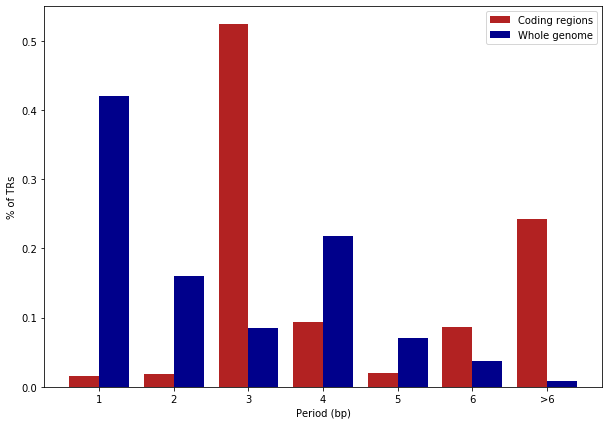

In [72]:
plt.figure(figsize=(10,7))
plt.bar([i-0.2 for i in range(1,8)], gene_vals, width=0.4, color = 'firebrick', label = 'Coding regions')
plt.bar([i+0.2 for i in range(1,8)], all_vals, width=0.4, color = 'darkblue', label = 'Whole genome')
plt.xticks(range(1,8),[str(i) for i in range(1,7)] + ['>6'])
plt.legend()
plt.xlabel("Period (bp)")
plt.ylabel("% of TRs")
plt.savefig("../plots/coding_period.pdf", dpi=1200, format='pdf')